# Take home exam 01

#### 4a) Show, by iterating two close initial conditions, that this map is chaotic.
$$
x_{n+1} = f (x_n) = (2x_n − 1)^3,\text{ for } x_n \in [−1, 1].
$$

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# Plot style
plt.style.use(['science', 'nature', 'high-vis'])

In [3]:
# Function
def map_4(x0, iter):

    # Initialize
    x = [x0]

    # Iterate
    for i in range(iter + 1):
        
        # Compute
        next = (2 * x[i] - 1)**3

        # Append
        x.append(next)

    return x
        

In [149]:
# Initial conditions
x0_array = np.linspace(0.999_999_999, 1, 10)

In [150]:
# Evolution and initial conditions
evolutions = []
initial_conditions = []

# Counter 
counter = 0

# Iterate over initial conditions
for x0 in x0_array:

    try:
        # Compute the map
        x = map_4(x0, 13)

        # Counter
        counter += 1

        # No infinite or NaN values
        if np.any(np.isinf(x)) or np.any(np.isnan(x)):
            continue

        # Append
        evolutions.append(x)
        initial_conditions.append(x0)

    except:
        print(f"Error with x0 = {x0}")
        continue

In [151]:
# Pick a  valid pair
two_evolutions = evolutions[-3:-1]
two_initial_conditions = initial_conditions[-3:-1]

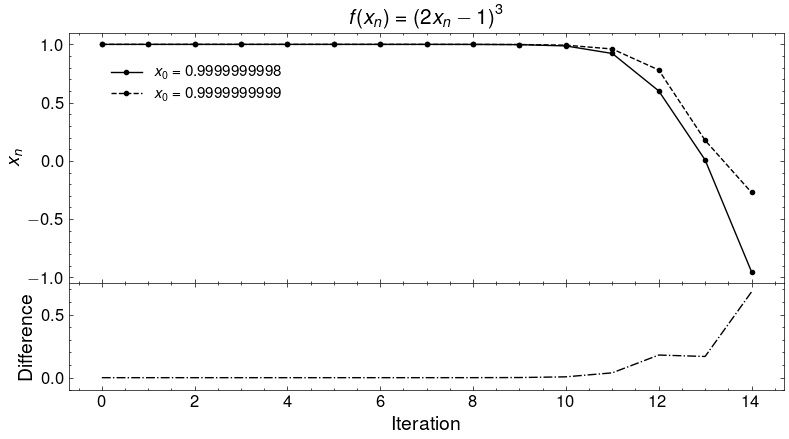

In [152]:
# Two panel plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4.5), sharex=True,
                               gridspec_kw={'hspace': 0, 'height_ratios': [7, 3]})

ax1.set_title(r"$f(x_n)=\left(2x_n-1\right)^3$", fontsize=15)
ax1.set_ylabel(r"$x_n$", fontsize=14)

# Plots
ax1.plot(range(len(two_evolutions[0])), two_evolutions[0],
         label=r'$x_0=$' + f" {two_initial_conditions[0]:.10f}",
         marker='o', color='k')
ax1.plot(range(len(two_evolutions[1])), two_evolutions[1],
         label=r'$x_0=$' + f" {two_initial_conditions[1]:.10f}",
         marker='o', color='k', ls='--')

ax1.legend(loc=(0.05, 0.70), fontsize=11)
ax1.tick_params(axis='both', labelsize=12)

# Difference
difference = np.abs(np.array(two_evolutions[0]) - np.array(two_evolutions[1]))
ax2.plot(range(len(difference)), difference, color='k', ls = "-.")
ax2.set_xlabel("Iteration", fontsize=14)
ax2.set_ylabel("Difference", fontsize=14)
ax2.tick_params(axis='both', labelsize=12)
ax2.set_ylim(-0.1, 0.75)

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()